In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Data
Data = load_boston()

boston_data = Data['data']
target = Data['target']
columns= Data['feature_names']

In [3]:
# Convert data into pandas DataFrame
df = pd.DataFrame(boston_data,columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
# Check if any missing data is present or not
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

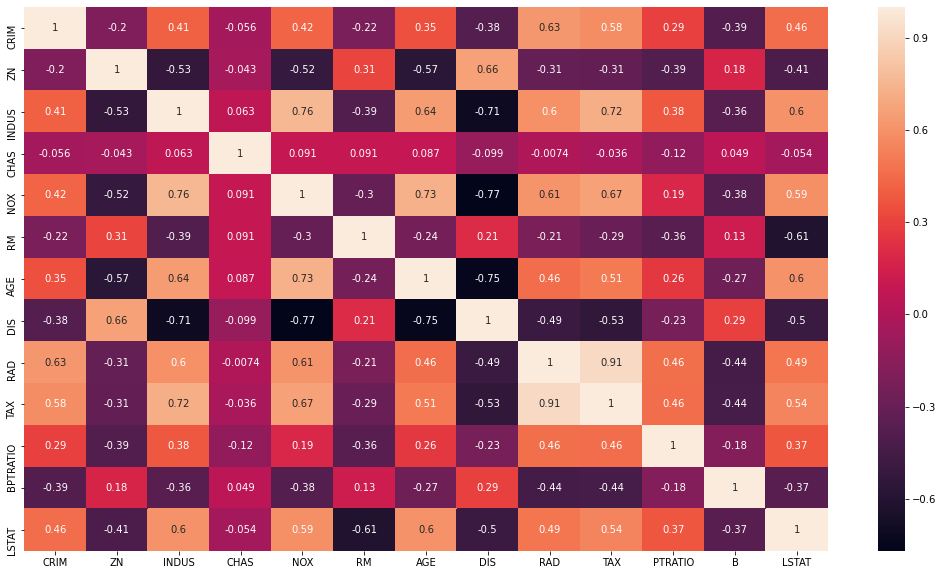

In [5]:
# Get the correlatoin matrix of the features
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,)

From the above heatmap of features it can be clearly seen that some of the features are highly correlated to each other.<br>
We need to drop such features before we build our linear regression model


In [6]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(df, 0.5)
print('correlated features: ', len(set(corr_features)) )

correlated features:  7


In [7]:
# List of Correlated features
print("Correlated Features are " +str(corr_features))

# Dropping the Correlated features
df = df.drop(corr_features, axis=1)

Correlated Features are {'AGE', 'TAX', 'INDUS', 'NOX', 'DIS', 'RAD', 'LSTAT'}


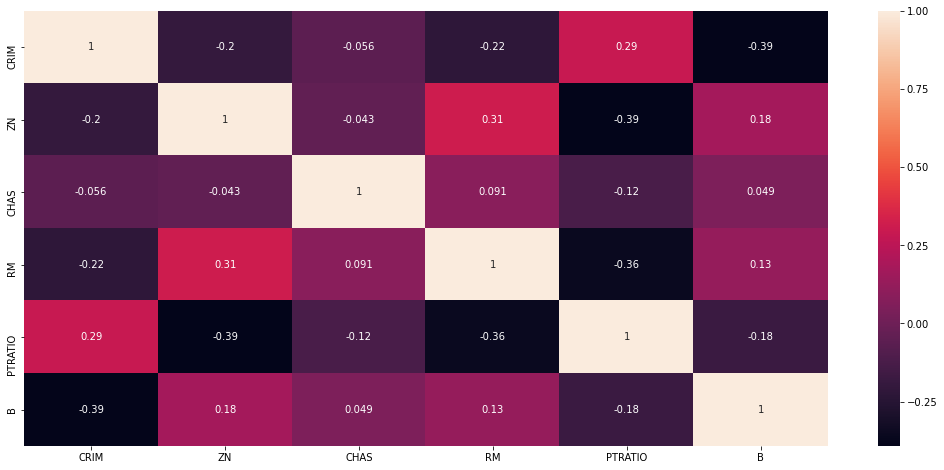

In [8]:
# Lets now check again the heatmap of correlations
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

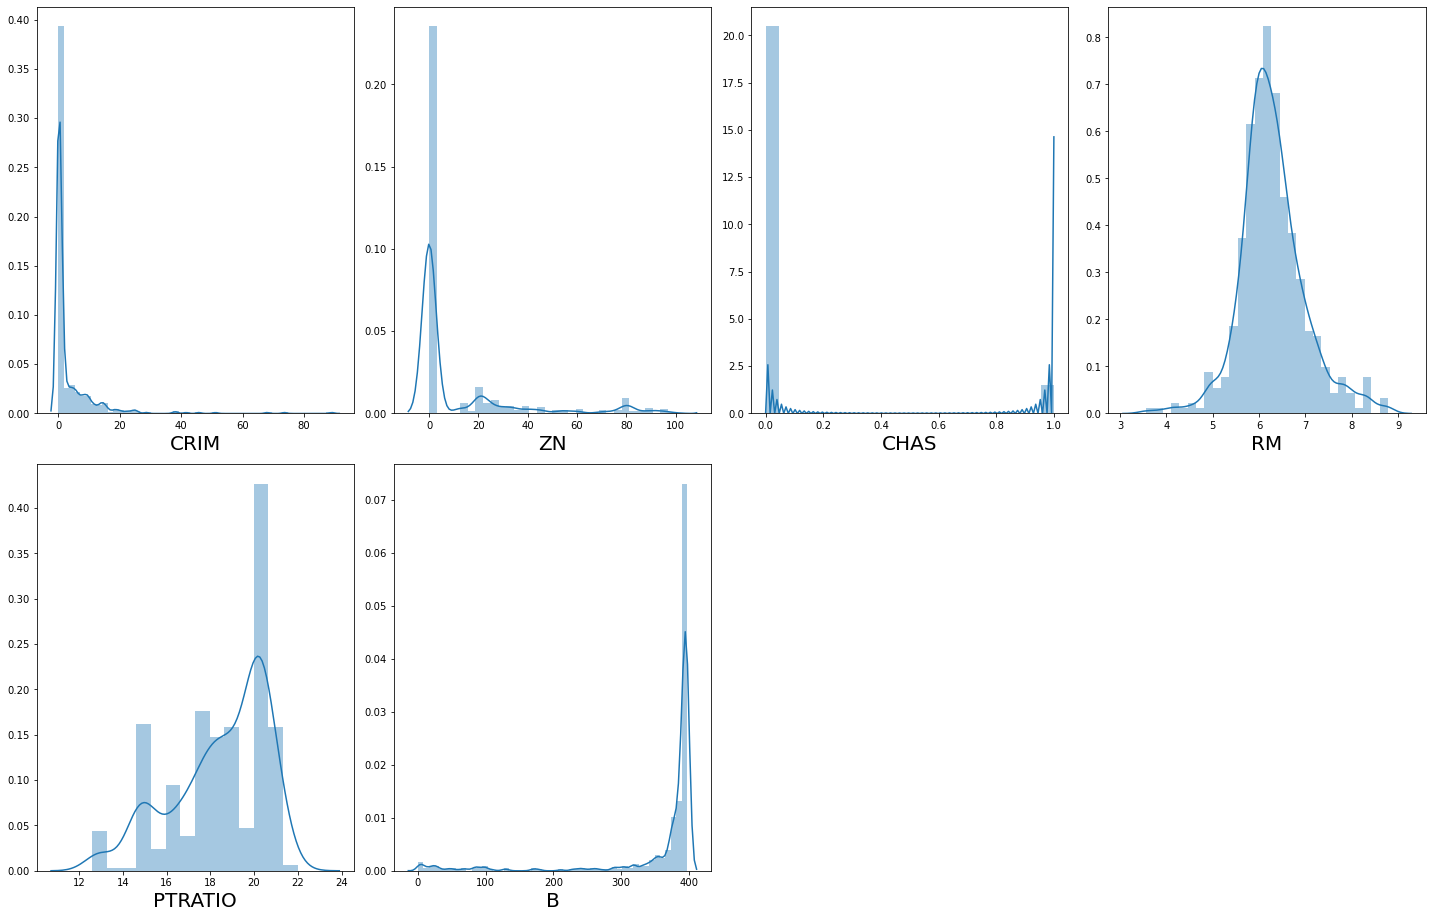

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
# Lets Check the skewness of the feature
for col in df.columns:
    print("Skewness of "+ str(col) +' is ' + str(df[col].skew()))

Skewness of CRIM is 5.223148798243851
Skewness of ZN is 2.2256663227354307
Skewness of CHAS is 3.405904172058746
Skewness of RM is 0.40361213328874385
Skewness of PTRATIO is -0.8023249268537809
Skewness of B is -2.8903737121414492


The feature CRIM, CHAS, B have is more skewed. We would try to reduce this skewness by transforming the data.<br>
The feature CHAS is a binary feature so we cannot reduce its skewness. But we can reduce skewness of the reamining features

In [11]:
# Feature Transformation
df['CRIM'] = np.log(df['CRIM'])
df['B'] = np.log(df['B'])

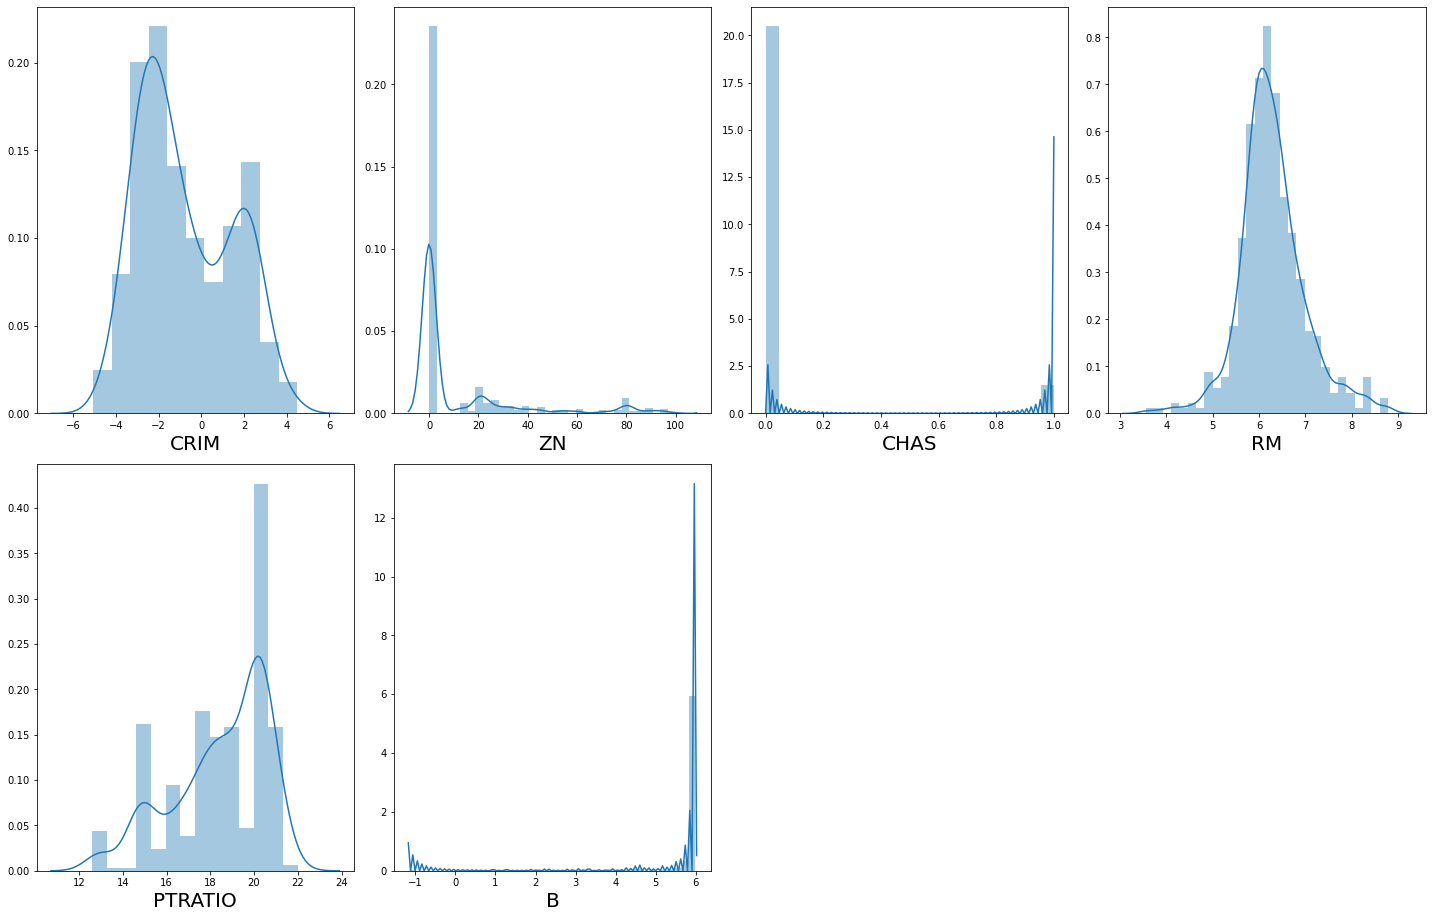

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

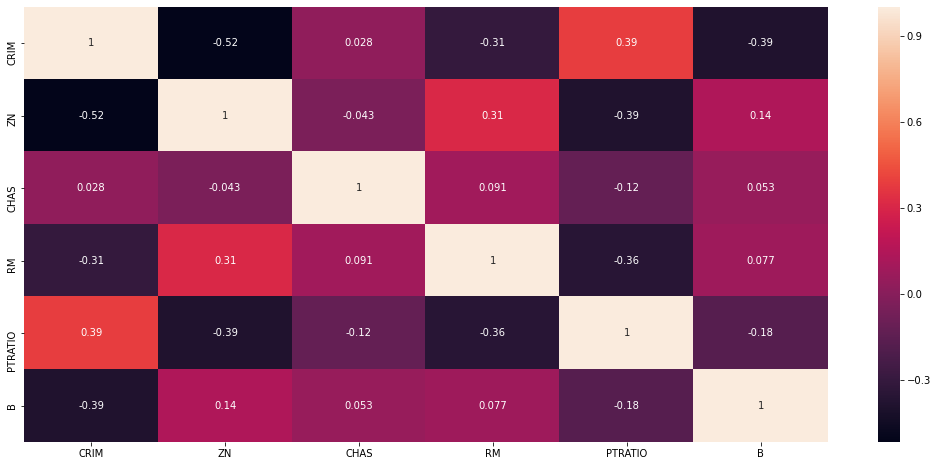

In [13]:
# Check correlation after feature transformation
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

We can see that feature ZN is negatively correlated with CRIM.So we will remove ZN feature.

In [14]:
df = df.drop(['ZN'],axis=1)

In [15]:
# Splitting the data into train test 
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

In [16]:
# Standaraising the data to similar scale
sd = StandardScaler()
sd.fit(X_train)
X_train_sd = sd.transform(X_train)
X_test_sd = sd.transform(X_test)

In [17]:
# Fitting the linear Regression Mode
lm = LinearRegression()
lm.fit(X_train_sd, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

23.01581920903961
[-1.31856744  1.20967252  5.19382407 -2.02519378  1.27747467]


In [18]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x, y, lm):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [19]:
y_pred_train = lm.predict(X_train_sd)
y_pred = lm.predict(X_test_sd)

In [20]:
print("The Adjusted R-Square value for train data " + str(adj_r2(X_train_sd, y_train, lm)))
print("The Adjusted R-Square value for test data " + str(adj_r2(X_test_sd, y_test, lm)))
print("The Mean Square error for test data " + str(mean_squared_error(y_test,y_pred)))

The Adjusted R-Square value for train data 0.6137915189862162
The Adjusted R-Square value for test data 0.5893032155789419
The Mean Square error for test data 29.588967927545504
